https://twitter.com/julia_kizi/status/1576613736755912704

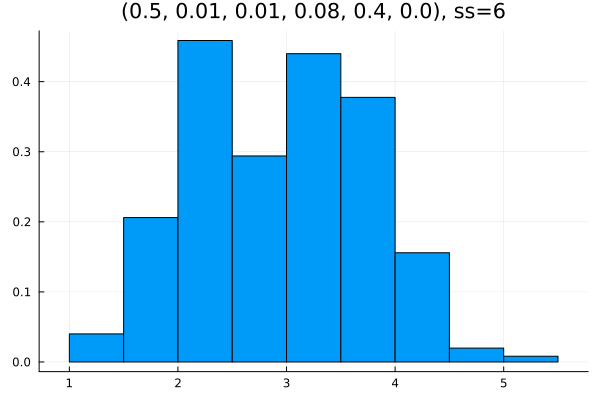

In [1]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

ntrials = 10^5
ss = samplesize = 6
tmp = Vector{Float64}(undef, samplesize)
dist = Categorical(0.5, 0.01, 0.01, 0.08, 0.4, 0.0)
means = [mean(rand!(dist, tmp)) for _ in 1:ntrials]
histogram(means; norm=true, bins=10, label="")
title = "$((dist.p...,)), ss=$ss"
plot!(; title)

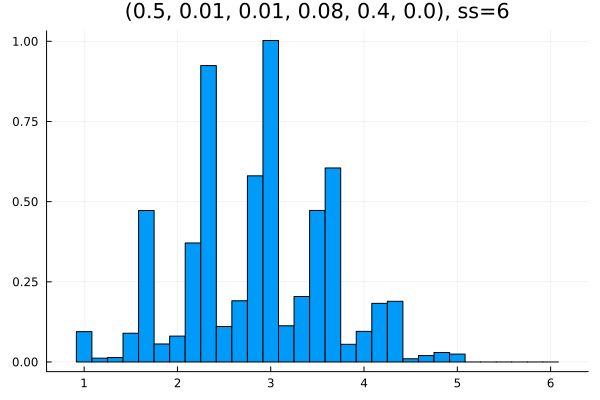

In [2]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

ntrials = 10^5
ss = samplesize = 6
tmp = Vector{Float64}(undef, samplesize)
dist = Categorical(0.5, 0.01, 0.01, 0.08, 0.4, 0.0)
means = [mean(rand!(dist, tmp)) for _ in 1:ntrials]
histogram(means; norm=true, bin=1-1/(2ss):1/ss:6+1/(2ss), label="")
title = "$((dist.p...,)), ss=$ss"
plot!(; title)

 24.955745 seconds (13.80 M allocations: 708.461 MiB, 0.48% gc time, 1.68% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0038\result6.gif
└ @ Plots D:\.julia\packages\Plots\W75kY\src\animation.jl:139


Plots.AnimatedGif("D:\\OneDrive\\public\\0038\\result6.gif")
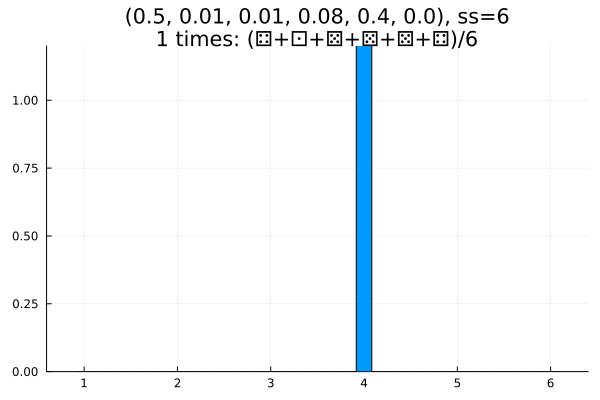

In [3]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

dice = '⚀':'⚅'
ntrials = 1000
ss = samplesize = 6
dist = Categorical(0.5, 0.01, 0.01, 0.08, 0.4, 0.0)
Xs = [rand(dist, ss) for _ in 1:ntrials]
means = mean.(Xs)
@time anim = @animate for t in [1:ntrials; fill(ntrials, 40)]
    X = Xs[t]
    @views histogram(means[1:t]; norm=true, bin=1-1/(2ss):1/ss:6+1/(2ss), label="")
    title = "$((dist.p...,)), ss=$ss\n"
    title *= "$t times: "
    title *= "($(dice[X[1]])" * prod("+$(dice[X[i]])" for i in 2:ss) * ")/$ss"
    plot!(; title, ylim=(0.0, 1.2))
end

gif(anim, "result6.gif")

 24.891773 seconds (13.07 M allocations: 669.838 MiB, 0.48% gc time, 0.36% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0038\result.gif
└ @ Plots D:\.julia\packages\Plots\W75kY\src\animation.jl:139


Plots.AnimatedGif("D:\\OneDrive\\public\\0038\\result.gif")
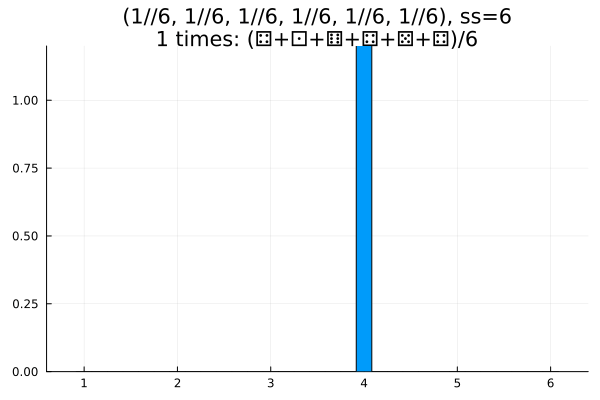

In [4]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

dice = '⚀':'⚅'
ntrials = 1000
ss = samplesize = 6
dist = Categorical(fill(1//6, ss))
Xs = [rand(dist, ss) for _ in 1:ntrials]
means = mean.(Xs)
@time anim = @animate for t in [1:ntrials; fill(ntrials, 40)]
    X = Xs[t]
    @views histogram(means[1:t]; norm=true, bin=1-1/(2ss):1/ss:6+1/(2ss), label="")
    title = "$((dist.p...,)), ss=$ss\n"
    title *= "$t times: "
    title *= "($(dice[X[1]])" * prod("+$(dice[X[i]])" for i in 2:ss) * ")/$ss"
    plot!(; title, ylim=(0.0, 1.2))
end

gif(anim, "result.gif")

dist = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(6)
p: [0.5, 0.01, 0.01, 0.07, 0.01, 0.4]
)



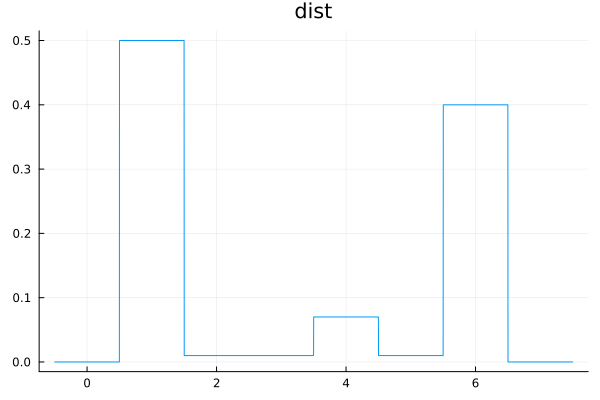

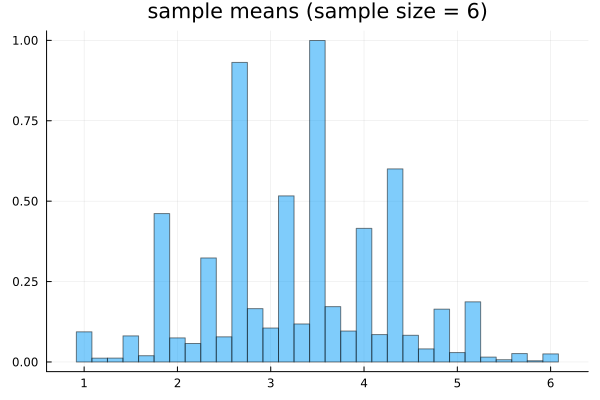

In [5]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

ntrials = 10^6
ss = samplesize = 6
tmp = Vector{Float64}(undef, samplesize)
dist = Categorical(0.5, 0.01, 0.01, 0.07, 0.01, 0.4)
@show dist
plot(x -> pdf(dist, round(x)), -0.5, 7.5; label="", title="dist") |> display
means = [mean(rand!(dist, tmp)) for _ in 1:ntrials]
histogram(means; norm=true, alpha=0.5, bin=1-1/(2ss):1/ss:6+1/(2ss), label="")
title!("sample means (sample size = $ss)")

dist = MixtureModel{Normal{Float64}}(K = 3)
components[1] (prior = 0.5000): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.1000): Normal{Float64}(μ=12.0, σ=1.0)
components[3] (prior = 0.4000): Normal{Float64}(μ=20.0, σ=1.0)



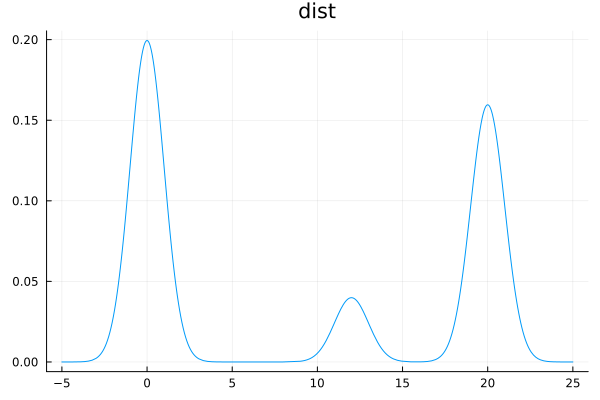

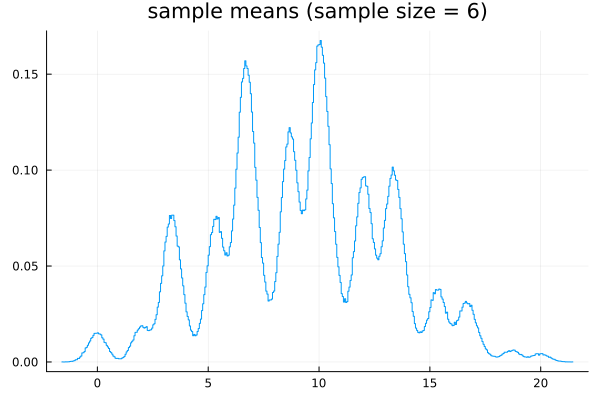

In [6]:
using Distributions
using Random
using StatsPlots
Random.seed!(4649373)

ntrials = 10^6
ss = samplesize = 6
tmp = Vector{Float64}(undef, samplesize)
dist = MixtureModel([Normal(0,1), Normal(12,1), Normal(20,1)], [0.5, 0.1, 0.4])
@show dist
plot(x -> pdf(dist, x), -5, 25; label="", title="dist") |> display
means = [mean(rand!(dist, tmp)) for _ in 1:ntrials]
stephist(means; norm=true, bin=1000, label="")
title!("sample means (sample size = $ss)")